In [46]:
from datetime import date, timedelta
import pandas as pd

%matplotlib inline

In [38]:
start = date(2020, 1, 22)
end = date.today()


df = pd.DataFrame()
while start < end:
    df_day = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{start.month:02d}-{start.day:02d}-{start.year}.csv')
    df_day['Date'] = start
    df = df.append(df_day)
    start += timedelta(days=1)
    
del df['Last Update']
df.fillna({'Province/State': '', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)

In [39]:
df.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date,Latitude,Longitude
261,Northern Territory,Australia,0.0,0.0,0.0,2020-03-09,-12.4634,130.8456
262,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0,2020-03-09,29.3829,-98.6134
263,"Montgomery County, TX",US,0.0,0.0,0.0,2020-03-09,30.3213,-95.4778
264,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0,2020-03-09,41.2545,-95.9758
265,"Travis, CA (From Diamond Princess)",US,0.0,0.0,0.0,2020-03-09,38.2721,-121.9399


In [42]:
confirmed_by_date = df[df['Country/Region'] == 'US'][['Date', 'Confirmed']].groupby('Date').sum()

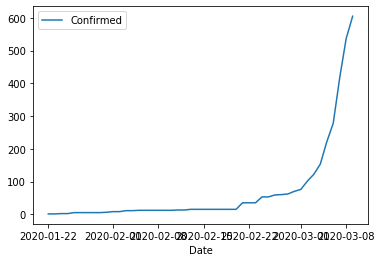

In [47]:
confirmed_by_date.plot()